Wahlpflichtfach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**<< 11 - TensorFlow - Einführung**](11%20-%20TensorFlow%20-%20Einführung.ipynb)

---

# 12 - <img src=https://www.gstatic.com/devrel-devsite/prod/vf8bcd170103a60a9457e3a7682d3f70251c619395c6349d20b56cd2a80761a19/tensorflow/images/lockup.svg height=30 alt="Tensorflow"> - Grundlagen

Nachdem wir uns gerade angeguckt haben, wie wir eigene Schichten erstellen und kombinieren, das neuronale Netz optimieren und den Trainingsfortschritt visualisieren, wollen wir uns jetzt mit den Built-In Funktionen von Tensorflow vertraut machen.

In [1]:
import numpy as np
import datetime

# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
import matplotlib.pyplot as plt
# COMMENT OUT NEXT LINE FOR COLAB!
# %matplotlib notebook

2023-03-04 10:22:22.341893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-04 10:22:22.504090: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-04 10:22:22.504109: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-04 10:22:23.029638: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
print(tf.__version__)

2.11.0


## Erstellen eines kleinen Regressions-Datensatz
Zuerst erstell wir uns erneut einen Dummy-Regressions-Datensatz 

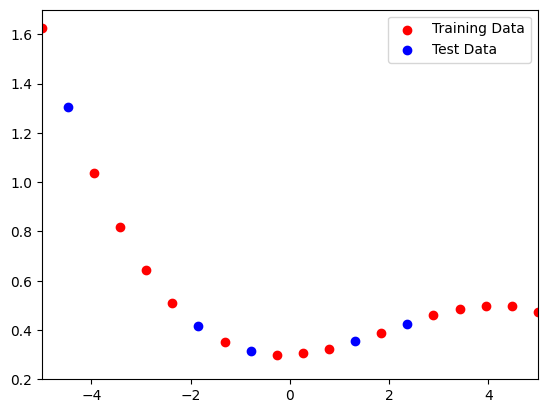

In [3]:
xs = np.linspace(-5,5, 20, dtype=np.float32)
def f(x):
    return 0.005*(-x**3+6*x**2+2*x)+0.3
ys = f(xs)

training_data_ids = np.random.choice(20,15, replace=False)
test_data_ids = np.array([i if i not in training_data_ids else 99 for i in range(20)])
test_data_ids = test_data_ids[test_data_ids < 21]
training_data_xs = xs[training_data_ids]
training_data_ys = ys[training_data_ids]
test_data_xs = xs[test_data_ids]
test_data_ys = ys[test_data_ids]

plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')
plt.legend(("Training Data","Test Data"), loc='upper right')
plt.xlim(-5,5)
plt.ylim(0.2,1.7)
plt.show()

Wir müssen nicht unbedingt `tf.data.Dataset`s erstellen. Aber wir müssen trotzdem die Shape der Arrays anpassen, so dass sie 2 Dimensionen haben. 

In [4]:
x_train = np.expand_dims(training_data_xs, axis=1)
x_test = np.expand_dims(test_data_xs, axis=1)
y_train = np.expand_dims(training_data_ys, axis=1)
y_test = np.expand_dims(test_data_ys, axis=1)

## Erstellen des neuronalen Netzes
In der nächsten Zelle erstellen wir das neuronale Netz. Dafür verwenden wir ein [sequentielles Modell](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?hl=en). Diese hilft dabei ein Modell aus einer Liste von Schichten zu erstellen und die Schichten zu trainieren. Als Schichten nehmen wir das [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?hl=en)-Layer.

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# clear the session
tf.keras.backend.clear_session()

# create the model
model = Sequential([Dense(512, activation='relu'), Dense(1)])
model.compile(optimizer='adam',
              loss='mse',
              metrics='mse')

2023-03-04 10:22:47.464104: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-04 10:22:47.464126: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-04 10:22:47.464143: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist
2023-03-04 10:22:47.464343: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Einrichten von TensorBoard
Um die Visualisierung des Trainings zu automatisieren, kann [TensorBoard](https://www.tensorflow.org/tensorboard) verwendet werden. Dieses hilft dabei den Trainingsfortschritt zu visualisieren. Um TensorBoard im Training zu aktivieren müssen wir uns eine callback-Funktion erstellen ([Doku](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard?hl=en)). 

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

## Trainieren des neuronalen Netzes
Für das Training müssen wir nicht unbedingt eine Trainingschleife schreiben. Stattdessen können wir auch die `fit()`-Methode des `Sequential`-Modells verwenden.

In [7]:
model.fit(x=x_train, 
          y=y_train,
          batch_size=15,
          epochs=1000, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/1000
1/1 [==============================] - 0s 486ms/step - loss: 0.6745 - mse: 0.6745 - val_loss: 0.5180 - val_mse: 0.5180
Epoch 2/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.5274 - mse: 0.5274 - val_loss: 0.4073 - val_mse: 0.4073
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.4015 - mse: 0.4015 - val_loss: 0.3114 - val_mse: 0.3114
Epoch 4/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2966 - mse: 0.2966 - val_loss: 0.2303 - val_mse: 0.2303
Epoch 5/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2121 - mse: 0.2121 - val_loss: 0.1636 - val_mse: 0.1636
Epoch 6/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1469 - mse: 0.1469 - val_loss: 0.1106 - val_mse: 0.1106
Epoch 7/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0999 - mse: 0.0999 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 8/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0685 - 

1/1 [==============================] - 0s 29ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 64/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 65/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 66/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 67/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0064 - val_mse: 0.0064
Epoch 68/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 69/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 70/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0126 - mse: 0.

Epoch 125/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 126/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 127/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 128/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 129/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0043 - val_mse: 0.0043
Epoch 130/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 131/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 132/1000
1/1 [==============================] - 0s 35ms/step - 

1/1 [==============================] - 0s 38ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 187/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 188/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 189/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 190/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 191/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 192/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 193/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0081 - 

Epoch 248/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 249/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 250/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 251/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 252/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 253/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 254/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 255/1000
1/1 [==============================] - 0s 34ms/step - 

1/1 [==============================] - 0s 34ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 310/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 311/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 312/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 313/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 314/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 315/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 316/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0047 - 

Epoch 371/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 372/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 373/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 374/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 375/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 376/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 377/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 378/1000
1/1 [==============================] - 0s 35ms/step - 

Epoch 430/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 6.1491e-04 - val_mse: 6.1491e-04
Epoch 431/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 6.0909e-04 - val_mse: 6.0909e-04
Epoch 432/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 6.0337e-04 - val_mse: 6.0337e-04
Epoch 433/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 5.9781e-04 - val_mse: 5.9781e-04
Epoch 434/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 5.9240e-04 - val_mse: 5.9240e-04
Epoch 435/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 5.8713e-04 - val_mse: 5.8713e-04
Epoch 436/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 5.8205e-04 - val_mse: 5.8205e-04
Epoch 437/100

1/1 [==============================] - 0s 34ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 4.0260e-04 - val_mse: 4.0260e-04
Epoch 489/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 4.0053e-04 - val_mse: 4.0053e-04
Epoch 490/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.9860e-04 - val_mse: 3.9860e-04
Epoch 491/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.9678e-04 - val_mse: 3.9678e-04
Epoch 492/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.9499e-04 - val_mse: 3.9499e-04
Epoch 493/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.9324e-04 - val_mse: 3.9324e-04
Epoch 494/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 3.9141e-04 - val_mse: 3.9141e-04
Epoch 495/1000
1/1 [========

1/1 [==============================] - 0s 35ms/step - loss: 8.7436e-04 - mse: 8.7436e-04 - val_loss: 3.2369e-04 - val_mse: 3.2369e-04
Epoch 546/1000
1/1 [==============================] - 0s 36ms/step - loss: 8.6825e-04 - mse: 8.6825e-04 - val_loss: 3.2306e-04 - val_mse: 3.2306e-04
Epoch 547/1000
1/1 [==============================] - 0s 34ms/step - loss: 8.6215e-04 - mse: 8.6215e-04 - val_loss: 3.2242e-04 - val_mse: 3.2242e-04
Epoch 548/1000
1/1 [==============================] - 0s 33ms/step - loss: 8.5611e-04 - mse: 8.5611e-04 - val_loss: 3.2169e-04 - val_mse: 3.2169e-04
Epoch 549/1000
1/1 [==============================] - 0s 35ms/step - loss: 8.5011e-04 - mse: 8.5011e-04 - val_loss: 3.2091e-04 - val_mse: 3.2091e-04
Epoch 550/1000
1/1 [==============================] - 0s 34ms/step - loss: 8.4413e-04 - mse: 8.4413e-04 - val_loss: 3.2016e-04 - val_mse: 3.2016e-04
Epoch 551/1000
1/1 [==============================] - 0s 35ms/step - loss: 8.3818e-04 - mse: 8.3818e-04 - val_loss: 3.195

1/1 [==============================] - 0s 35ms/step - loss: 5.9213e-04 - mse: 5.9213e-04 - val_loss: 3.1168e-04 - val_mse: 3.1168e-04
Epoch 601/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.8807e-04 - mse: 5.8807e-04 - val_loss: 3.1225e-04 - val_mse: 3.1225e-04
Epoch 602/1000
1/1 [==============================] - 0s 33ms/step - loss: 5.8408e-04 - mse: 5.8408e-04 - val_loss: 3.1226e-04 - val_mse: 3.1226e-04
Epoch 603/1000
1/1 [==============================] - 0s 34ms/step - loss: 5.8011e-04 - mse: 5.8011e-04 - val_loss: 3.1179e-04 - val_mse: 3.1179e-04
Epoch 604/1000
1/1 [==============================] - 0s 35ms/step - loss: 5.7618e-04 - mse: 5.7618e-04 - val_loss: 3.1178e-04 - val_mse: 3.1178e-04
Epoch 605/1000
1/1 [==============================] - 0s 33ms/step - loss: 5.7221e-04 - mse: 5.7221e-04 - val_loss: 3.1224e-04 - val_mse: 3.1224e-04
Epoch 606/1000
1/1 [==============================] - 0s 34ms/step - loss: 5.6834e-04 - mse: 5.6834e-04 - val_loss: 3.128

1/1 [==============================] - 0s 34ms/step - loss: 4.1889e-04 - mse: 4.1889e-04 - val_loss: 3.2030e-04 - val_mse: 3.2030e-04
Epoch 656/1000
1/1 [==============================] - 0s 36ms/step - loss: 4.1652e-04 - mse: 4.1652e-04 - val_loss: 3.2035e-04 - val_mse: 3.2035e-04
Epoch 657/1000
1/1 [==============================] - 0s 36ms/step - loss: 4.1414e-04 - mse: 4.1414e-04 - val_loss: 3.2026e-04 - val_mse: 3.2026e-04
Epoch 658/1000
1/1 [==============================] - 0s 36ms/step - loss: 4.1184e-04 - mse: 4.1184e-04 - val_loss: 3.2028e-04 - val_mse: 3.2028e-04
Epoch 659/1000
1/1 [==============================] - 0s 35ms/step - loss: 4.0954e-04 - mse: 4.0954e-04 - val_loss: 3.2062e-04 - val_mse: 3.2062e-04
Epoch 660/1000
1/1 [==============================] - 0s 38ms/step - loss: 4.0726e-04 - mse: 4.0726e-04 - val_loss: 3.2127e-04 - val_mse: 3.2127e-04
Epoch 661/1000
1/1 [==============================] - 0s 40ms/step - loss: 4.0500e-04 - mse: 4.0500e-04 - val_loss: 3.219

1/1 [==============================] - 0s 35ms/step - loss: 3.2320e-04 - mse: 3.2320e-04 - val_loss: 3.1730e-04 - val_mse: 3.1730e-04
Epoch 711/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.2194e-04 - mse: 3.2194e-04 - val_loss: 3.1690e-04 - val_mse: 3.1690e-04
Epoch 712/1000
1/1 [==============================] - 0s 34ms/step - loss: 3.2069e-04 - mse: 3.2069e-04 - val_loss: 3.1635e-04 - val_mse: 3.1635e-04
Epoch 713/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.1943e-04 - mse: 3.1943e-04 - val_loss: 3.1580e-04 - val_mse: 3.1580e-04
Epoch 714/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.1819e-04 - mse: 3.1819e-04 - val_loss: 3.1519e-04 - val_mse: 3.1519e-04
Epoch 715/1000
1/1 [==============================] - 0s 35ms/step - loss: 3.1696e-04 - mse: 3.1696e-04 - val_loss: 3.1441e-04 - val_mse: 3.1441e-04
Epoch 716/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.1573e-04 - mse: 3.1573e-04 - val_loss: 3.136

1/1 [==============================] - 0s 34ms/step - loss: 2.6162e-04 - mse: 2.6162e-04 - val_loss: 2.9180e-04 - val_mse: 2.9180e-04
Epoch 766/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.6063e-04 - mse: 2.6063e-04 - val_loss: 2.9177e-04 - val_mse: 2.9177e-04
Epoch 767/1000
1/1 [==============================] - 0s 36ms/step - loss: 2.5964e-04 - mse: 2.5964e-04 - val_loss: 2.9143e-04 - val_mse: 2.9143e-04
Epoch 768/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.5866e-04 - mse: 2.5866e-04 - val_loss: 2.9072e-04 - val_mse: 2.9072e-04
Epoch 769/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.5767e-04 - mse: 2.5767e-04 - val_loss: 2.8981e-04 - val_mse: 2.8981e-04
Epoch 770/1000
1/1 [==============================] - 0s 39ms/step - loss: 2.5669e-04 - mse: 2.5669e-04 - val_loss: 2.8908e-04 - val_mse: 2.8908e-04
Epoch 771/1000
1/1 [==============================] - 0s 38ms/step - loss: 2.5572e-04 - mse: 2.5572e-04 - val_loss: 2.887

1/1 [==============================] - 0s 34ms/step - loss: 2.1405e-04 - mse: 2.1405e-04 - val_loss: 2.7527e-04 - val_mse: 2.7527e-04
Epoch 821/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1331e-04 - mse: 2.1331e-04 - val_loss: 2.7566e-04 - val_mse: 2.7566e-04
Epoch 822/1000
1/1 [==============================] - 0s 37ms/step - loss: 2.1257e-04 - mse: 2.1257e-04 - val_loss: 2.7581e-04 - val_mse: 2.7581e-04
Epoch 823/1000
1/1 [==============================] - 0s 34ms/step - loss: 2.1183e-04 - mse: 2.1183e-04 - val_loss: 2.7538e-04 - val_mse: 2.7538e-04
Epoch 824/1000
1/1 [==============================] - 0s 33ms/step - loss: 2.1110e-04 - mse: 2.1110e-04 - val_loss: 2.7433e-04 - val_mse: 2.7433e-04
Epoch 825/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.1037e-04 - mse: 2.1037e-04 - val_loss: 2.7311e-04 - val_mse: 2.7311e-04
Epoch 826/1000
1/1 [==============================] - 0s 35ms/step - loss: 2.0964e-04 - mse: 2.0964e-04 - val_loss: 2.722

1/1 [==============================] - 0s 38ms/step - loss: 1.7515e-04 - mse: 1.7515e-04 - val_loss: 2.6083e-04 - val_mse: 2.6083e-04
Epoch 876/1000
1/1 [==============================] - 0s 37ms/step - loss: 1.7450e-04 - mse: 1.7450e-04 - val_loss: 2.6075e-04 - val_mse: 2.6075e-04
Epoch 877/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7385e-04 - mse: 1.7385e-04 - val_loss: 2.6070e-04 - val_mse: 2.6070e-04
Epoch 878/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.7323e-04 - mse: 1.7323e-04 - val_loss: 2.6054e-04 - val_mse: 2.6054e-04
Epoch 879/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.7256e-04 - mse: 1.7256e-04 - val_loss: 2.6045e-04 - val_mse: 2.6045e-04
Epoch 880/1000
1/1 [==============================] - 0s 34ms/step - loss: 1.7192e-04 - mse: 1.7192e-04 - val_loss: 2.6045e-04 - val_mse: 2.6045e-04
Epoch 881/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.7128e-04 - mse: 1.7128e-04 - val_loss: 2.604

1/1 [==============================] - 0s 39ms/step - loss: 1.4477e-04 - mse: 1.4477e-04 - val_loss: 2.4996e-04 - val_mse: 2.4996e-04
Epoch 931/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4434e-04 - mse: 1.4434e-04 - val_loss: 2.5014e-04 - val_mse: 2.5014e-04
Epoch 932/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4390e-04 - mse: 1.4390e-04 - val_loss: 2.5047e-04 - val_mse: 2.5047e-04
Epoch 933/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4349e-04 - mse: 1.4349e-04 - val_loss: 2.5058e-04 - val_mse: 2.5058e-04
Epoch 934/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.4305e-04 - mse: 1.4305e-04 - val_loss: 2.5067e-04 - val_mse: 2.5067e-04
Epoch 935/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.4263e-04 - mse: 1.4263e-04 - val_loss: 2.5079e-04 - val_mse: 2.5079e-04
Epoch 936/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.4221e-04 - mse: 1.4221e-04 - val_loss: 2.508

1/1 [==============================] - 0s 35ms/step - loss: 1.2364e-04 - mse: 1.2364e-04 - val_loss: 2.4189e-04 - val_mse: 2.4189e-04
Epoch 986/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2330e-04 - mse: 1.2330e-04 - val_loss: 2.4231e-04 - val_mse: 2.4231e-04
Epoch 987/1000
1/1 [==============================] - 0s 33ms/step - loss: 1.2296e-04 - mse: 1.2296e-04 - val_loss: 2.4224e-04 - val_mse: 2.4224e-04
Epoch 988/1000
1/1 [==============================] - 0s 35ms/step - loss: 1.2263e-04 - mse: 1.2263e-04 - val_loss: 2.4167e-04 - val_mse: 2.4167e-04
Epoch 989/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2230e-04 - mse: 1.2230e-04 - val_loss: 2.4100e-04 - val_mse: 2.4100e-04
Epoch 990/1000
1/1 [==============================] - 0s 38ms/step - loss: 1.2197e-04 - mse: 1.2197e-04 - val_loss: 2.4061e-04 - val_mse: 2.4061e-04
Epoch 991/1000
1/1 [==============================] - 0s 36ms/step - loss: 1.2163e-04 - mse: 1.2163e-04 - val_loss: 2.406

## TensorBoard
Das TensorBoard kann ganz einfach innerhalb von Jupyter Notebook verwendet werden.

In [8]:
%tensorboard --logdir logs/fit

## Vorhersagen treffen
Um für neue Daten eine Vorhersage zu treffen, kann die `predict()`-Methode des `Sequential`-Modells verwendet werden.

4/4 [==============================] - 0s 813us/step


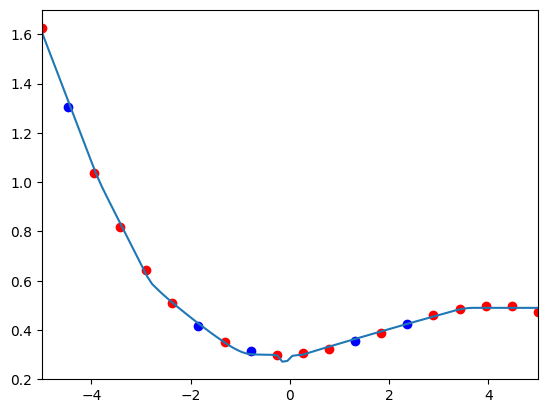

In [9]:
# Plot training and test data.
plt.figure()
plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')

# Calculate the network's output for 100 xs.
xs = np.linspace(-5,5,100, dtype=np.float32)
xs = np.reshape(xs, newshape=(-1,1))
ys = model.predict(xs)

# Plot it.
plt.plot(xs,ys)
plt.xlim(-5,5)
plt.ylim(0.2,1.7)
plt.show()

---

Wahlpflichtach Künstliche Intelligenz II: Praktikum | [Startseite](index.ipynb) | [**>> t.b.d.**]()